# Importing Dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

## Load Dataset

In [4]:
df = pd.read_csv('C:\\Users\\HP\\Downloads\\bank+marketing\\bank-additional\\bank-additional\\bank-additional-full.csv',sep=';')
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Dataset Overview

In [6]:
# Shape of the dataset

df.shape

(41188, 21)

In [7]:
# Columns of the dataset
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [8]:
df.rename(columns={'y':'deposit'}, inplace =True)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## EDA

In [10]:
# Information of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [11]:
# Checking null values

df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
deposit           0
dtype: int64

In [12]:
# Check duplicates

df.duplicated().sum()

12

In [13]:
# drop duplicates

df.drop_duplicates(inplace=True)

In [14]:
# Descriptive Statistics

df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [15]:
# Descriptive Statistics of Categorical column
df.describe(include='O')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,deposit
count,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10419,24921,12164,32577,21571,33938,26135,13767,8618,35551,36537


In [16]:
# Remove redudant columns

remove_cols=['contact','month','day_of_week']
df.drop(columns=remove_cols,inplace=True, axis=1)
print(df.shape)

(41176, 18)


 - contact: Only shows contact type cellular or telephone, doesnt have any impact on Target.
 - month and day of weeks = Gives only last contact month of year and last contact day of the week

In [18]:
categorical_cols = df.select_dtypes(include='O').columns

for col in categorical_cols:
    print('')
    print(df[col].value_counts())


job
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

marital
married     24921
single      11564
divorced     4611
unknown        80
Name: count, dtype: int64

education
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: count, dtype: int64

default
no         32577
unknown     8596
yes            3
Name: count, dtype: int64

housing
yes        21571
no         18615
unknown      990
Name: count, dtype: int64

loan
no         33938
yes         6248
unknown      990
Name: count, dtype: int64

poutcome
nonexistent    35551
failure         4252
success   

In [19]:
df['deposit'].value_counts(normalize=True) * 100

deposit
no     88.733728
yes    11.266272
Name: proportion, dtype: float64

C:\Users\HP\AppData\Local\Temp\ipykernel_11632\3426713240.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x=column_name,data=self.df,palette='Set1')


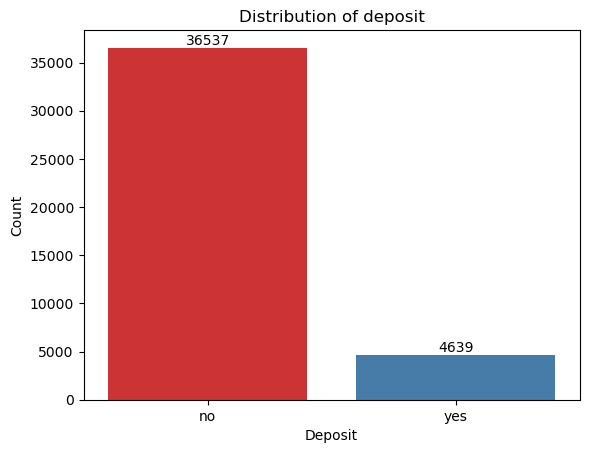

In [20]:
# Distribution of Target column

class Column_distribution:
    def __init__(self,dataframe):
        self.df=dataframe
    def Distribution(self,column_name):
        ax=sns.countplot(x=column_name,data=self.df,palette='Set1')
        for i in ax.containers:
            ax.bar_label(i)
        plt.title(f'Distribution of {column_name}')
        plt.xlabel(column_name.capitalize())
        plt.ylabel('Count')
        plt.show()
    
plotter = Column_distribution(df)
plotter.Distribution('deposit')

In [21]:
# Count 'Unknown' values in each column

unknown_counts={}

for col in df.columns:
    if df[col].dtype == 'object':
        count = (df[col]=='unknown').sum()
        if count>0:
            unknown_counts[col] = count

print(unknown_counts)

{'job': 330, 'marital': 80, 'education': 1730, 'default': 8596, 'housing': 990, 'loan': 990}


In [22]:
# Replacing unknown with most frequent known values from that column

for col in df.select_dtypes(include='O').columns:
    mode_value = df.loc[df[col]!='unknown',col].mode()[0]
    df[col] =df[col].replace('unknown',mode_value)

In [23]:
# Rechecking the column after replacing unknown

categorical_cols = df.select_dtypes(include='O').columns

for col in categorical_cols:
    print('')
    print(df[col].value_counts())


job
admin.           10749
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: count, dtype: int64

marital
married     25001
single      11564
divorced     4611
Name: count, dtype: int64

education
university.degree      13894
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
illiterate                18
Name: count, dtype: int64

default
no     41173
yes        3
Name: count, dtype: int64

housing
yes    22561
no     18615
Name: count, dtype: int64

loan
no     34928
yes     6248
Name: count, dtype: int64

poutcome
nonexistent    35551
failure         4252
success         1373
Name: count, dtype: int64

deposit
no     36537
yes     4639
Name: count, dtype: int64


In [24]:
df['default'].value_counts(normalize=True)*100

default
no     99.992714
yes     0.007286
Name: proportion, dtype: float64

In [25]:
df.drop(columns='default',inplace=True, axis=1)
print(df.columns)

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'deposit'],
      dtype='object')


- The default column is extremely imbalanced over 99.99% of customers have 'no' and only 3 have 'yes'. Since almost
 everyone has the same value, this column doesn't help distinguish or predict anything. It has low variance and high redundancy, therefore
 dropped from further analysis

In [27]:
numerical_cols = df.select_dtypes(include='number').columns
print('Total numeric features:',numerical_cols.shape)
print('\nNumeric features are',numerical_cols)

Total numeric features: (10,)

Numeric features are Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


## Distribution of Numeric Features

In [29]:
# Create a class for Histogram and Boxplot Visualization

class NumericalDistribution:
    def __init__(self,dataframe,columns):
        self.df=dataframe
        self.columns=columns
        
    def histplot(self):
        plt.figure(figsize=(20,25))
        for i,col in enumerate(self.columns,1):
            plt.subplot(4,3,i)
            sns.histplot(self.df[col],kde=True,color='blue')
            plt.title(f'Distribution of {col}')
            plt.xlabel(col)
            plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()

    def boxplot(self):
        plt.figure(figsize=(20,25))
        for i,col in enumerate(self.columns,1):
            plt.subplot(4,3,i)
            sns.boxplot(self.df[col])
            plt.title(f'Boxplot of {col}')
        plt.tight_layout()
        plt.show()
    

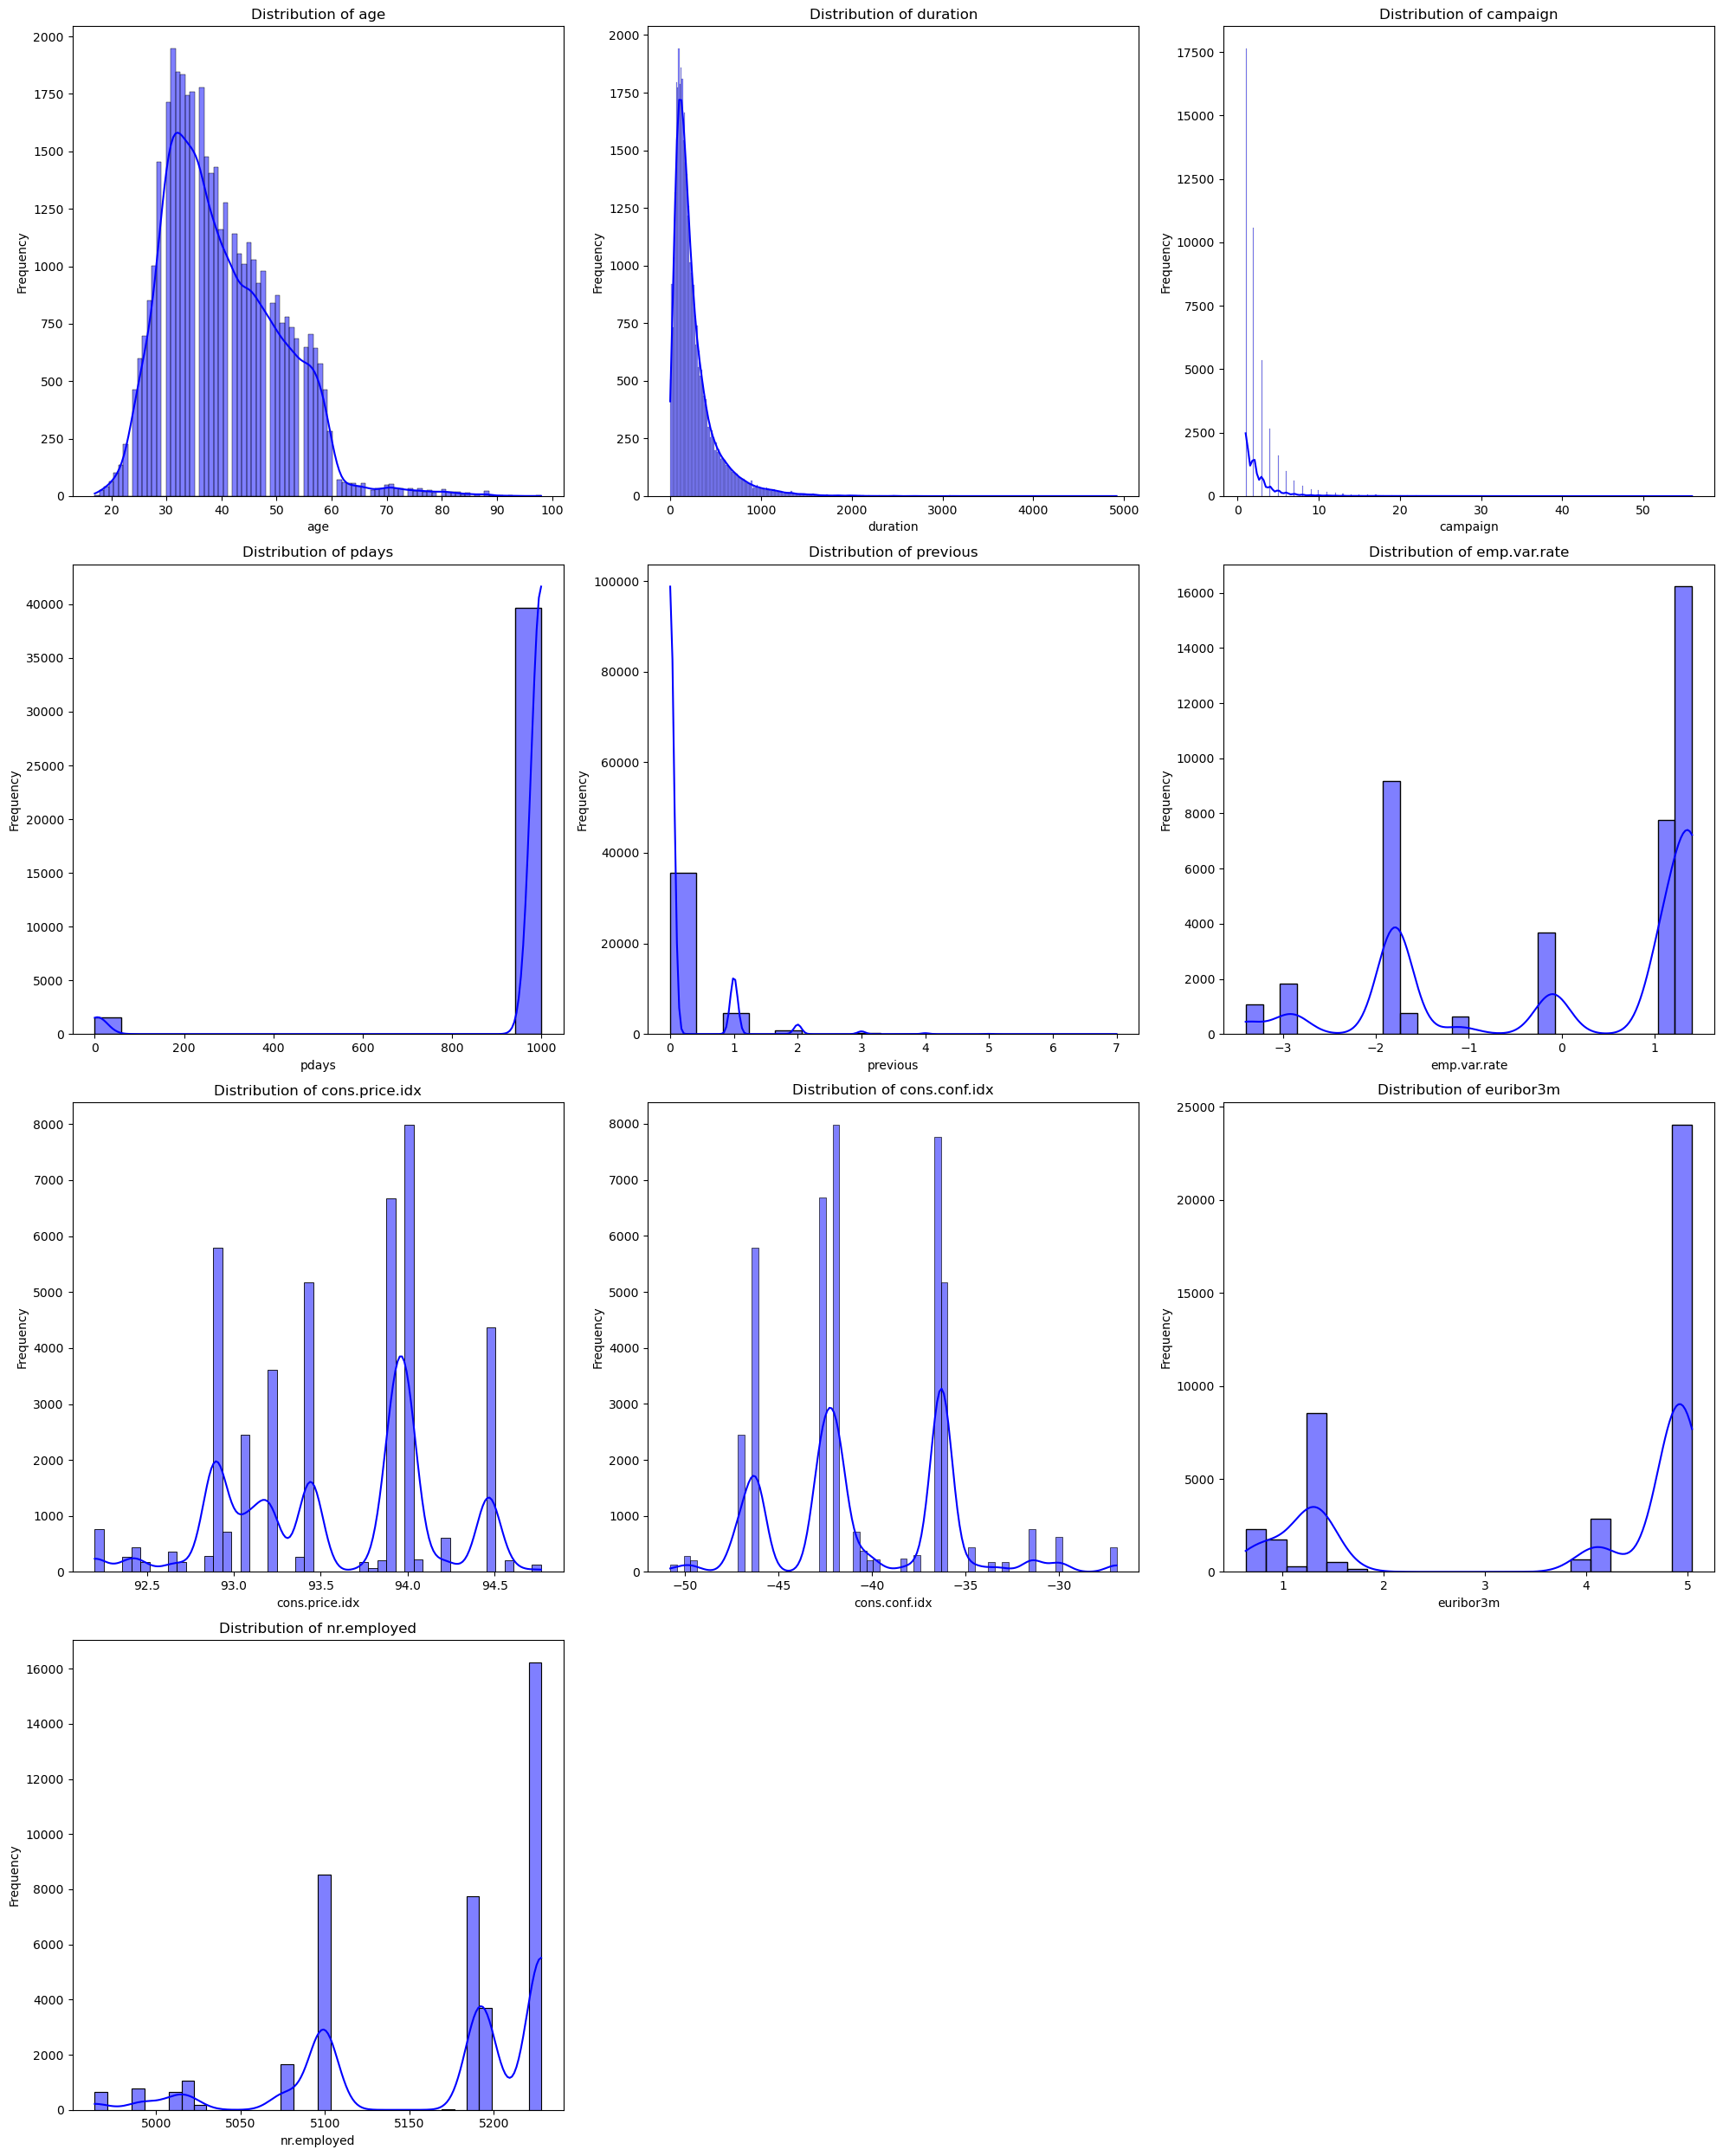

In [30]:
# Histogram of Numerical Columns

plotter_2 = NumericalDistribution(df,numerical_cols)
plotter_2.histplot()

In [31]:
print('The Skewness of Numerical Features:\n',df[numerical_cols].skew())
print('\n The Kurtosis of Numerical Features:\n',df[numerical_cols].kurtosis())

The Skewness of Numerical Features:
 age               0.784560
duration          3.262808
campaign          4.762044
pdays            -4.921386
previous          3.831396
emp.var.rate     -0.724061
cons.price.idx   -0.230853
cons.conf.idx     0.302876
euribor3m        -0.709194
nr.employed      -1.044317
dtype: float64

 The Kurtosis of Numerical Features:
 age                0.791113
duration          20.243771
campaign          36.971857
pdays             22.221553
previous          20.102164
emp.var.rate      -1.062698
cons.price.idx    -0.829851
cons.conf.idx     -0.359097
euribor3m         -1.406791
nr.employed       -0.003540
dtype: float64


## Outliers Detection

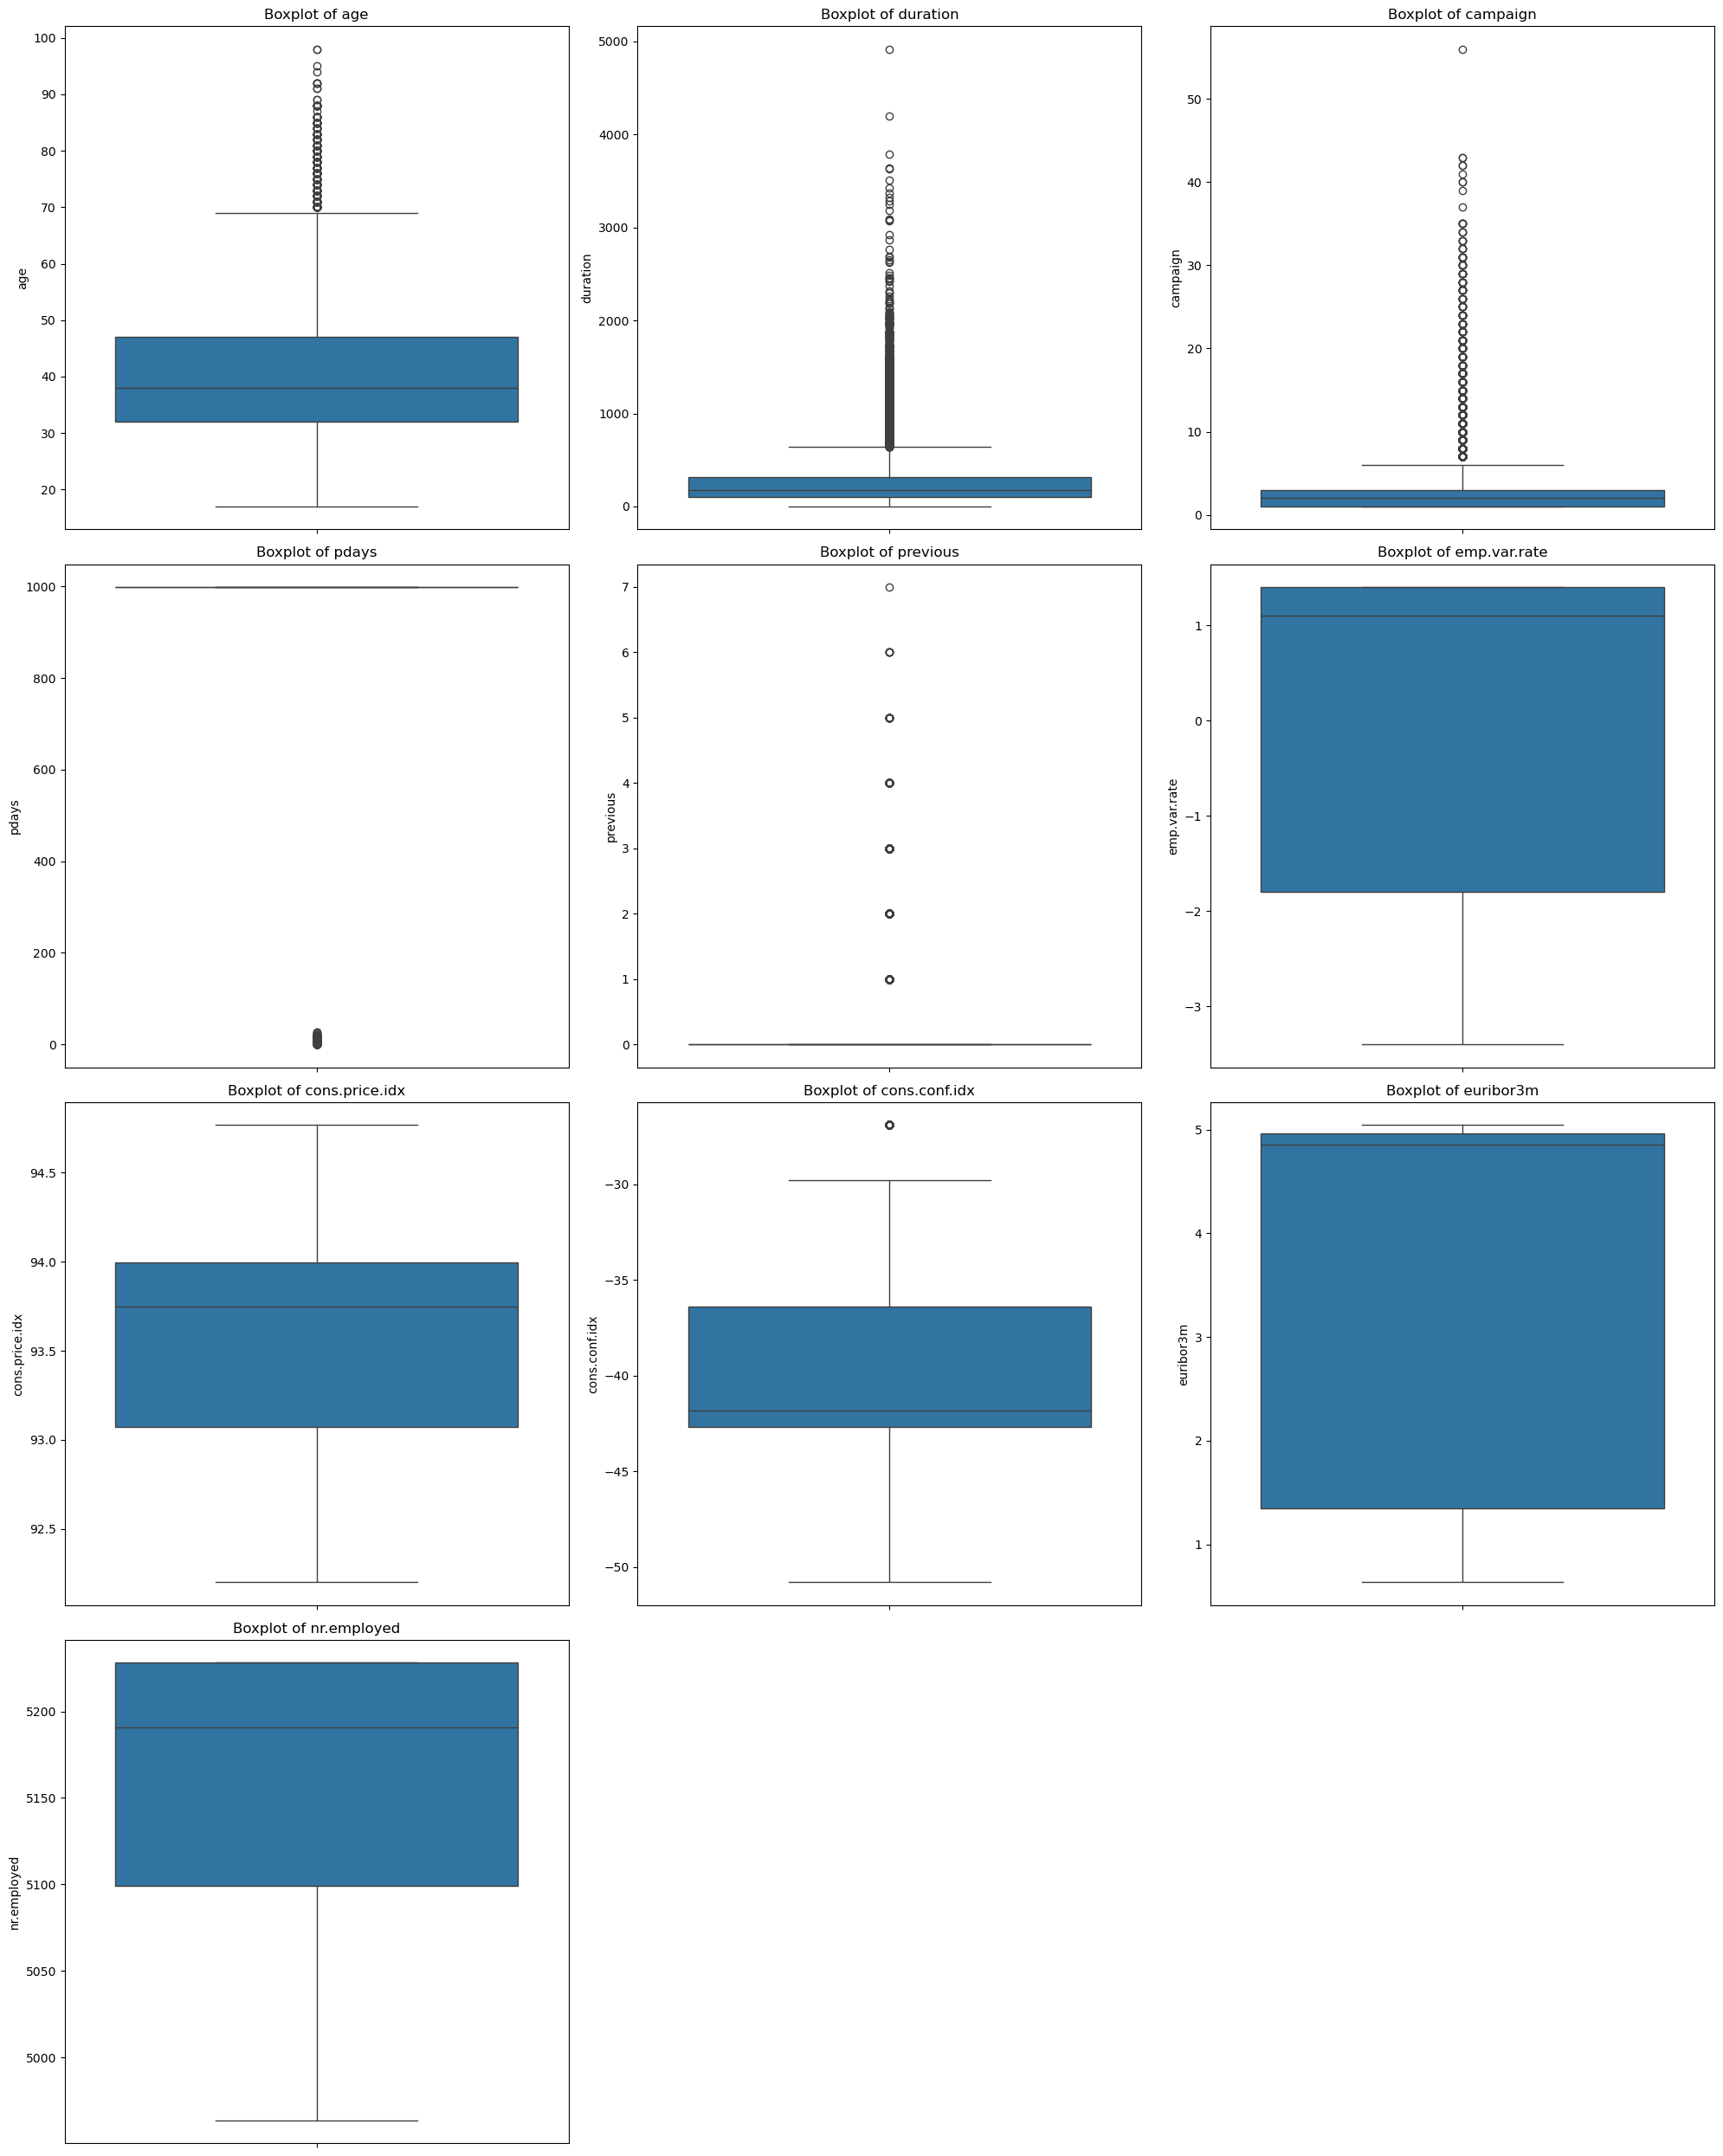

In [33]:
# Boxplot of Numerical Columns

plotter_2.boxplot()

### IQR for Removing Outliers

In [35]:
# Create function to remove outliers

def detect_outliers(df,columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3-Q1

        lower_bound = Q1-(1.5*IQR)
        upper_bound = Q3+(1.5*IQR)
        df[col] = df[col].clip(lower=lower_bound,upper=upper_bound)
    return df

# Applying to all numerical columns
df=detect_outliers(df,numerical_cols)
        

## After Removing Outliers

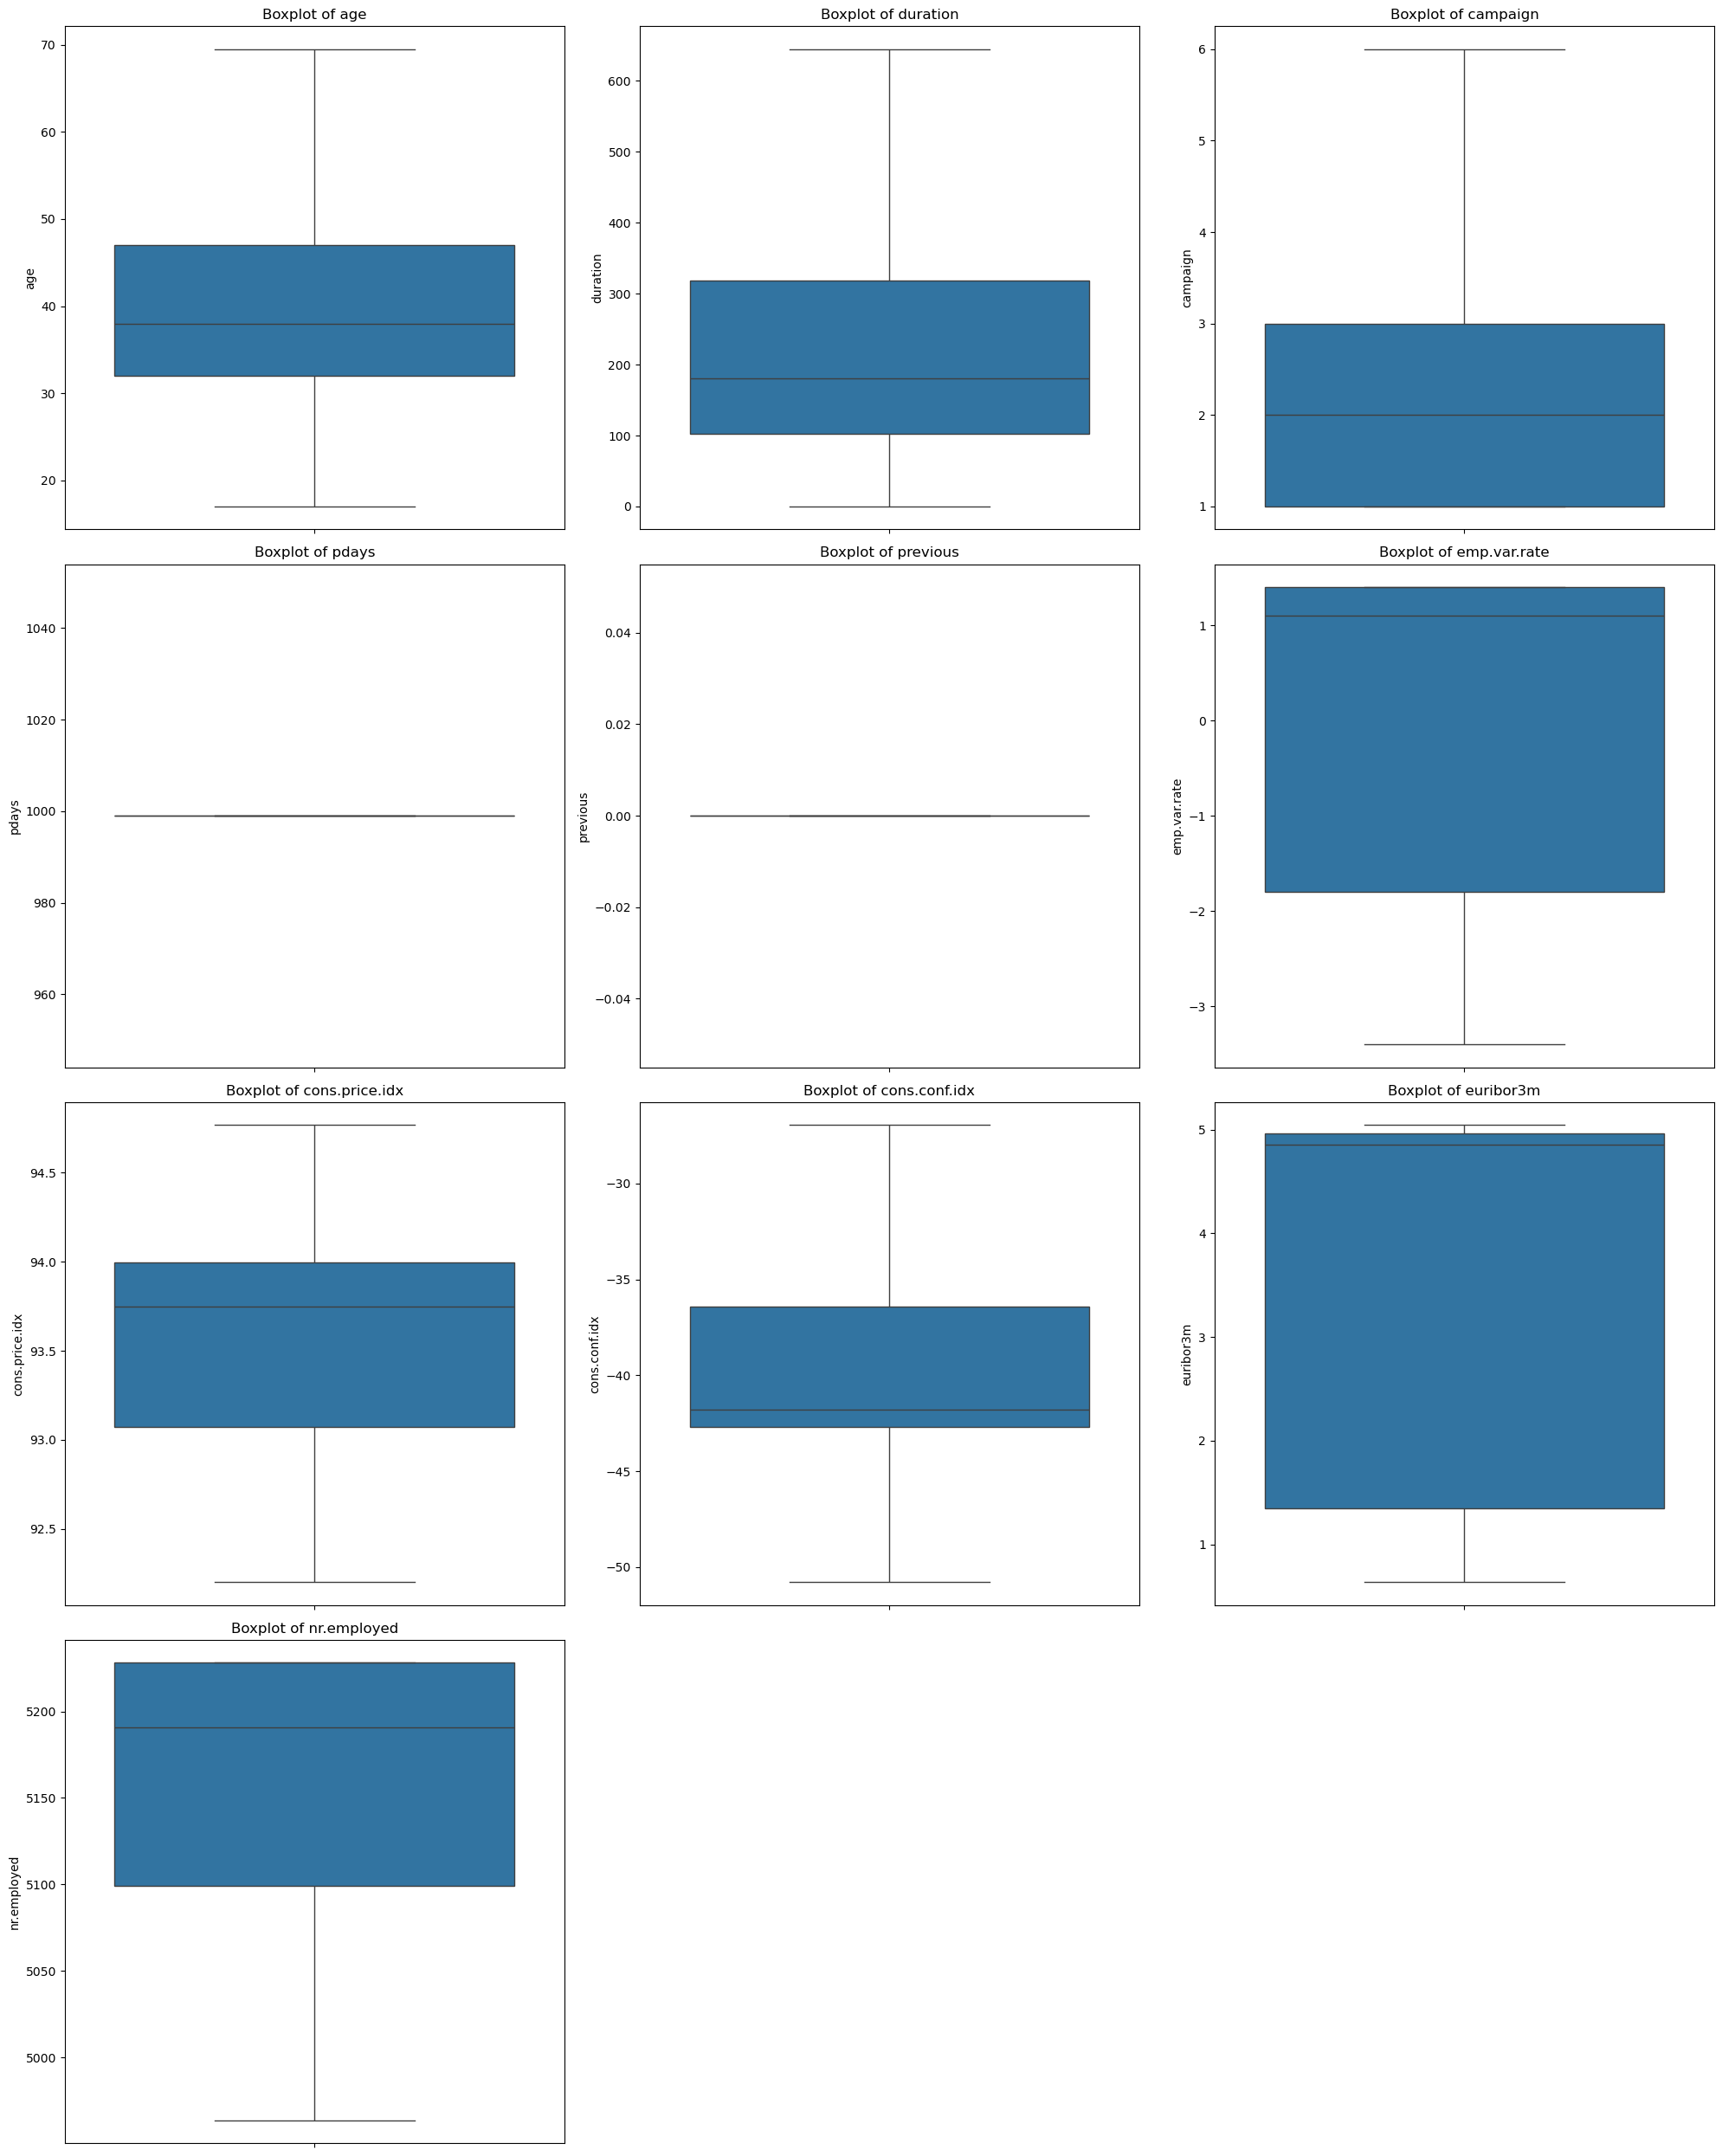

In [37]:
plotter_2.boxplot()

## Distribution of numerical Features after removing Outliers

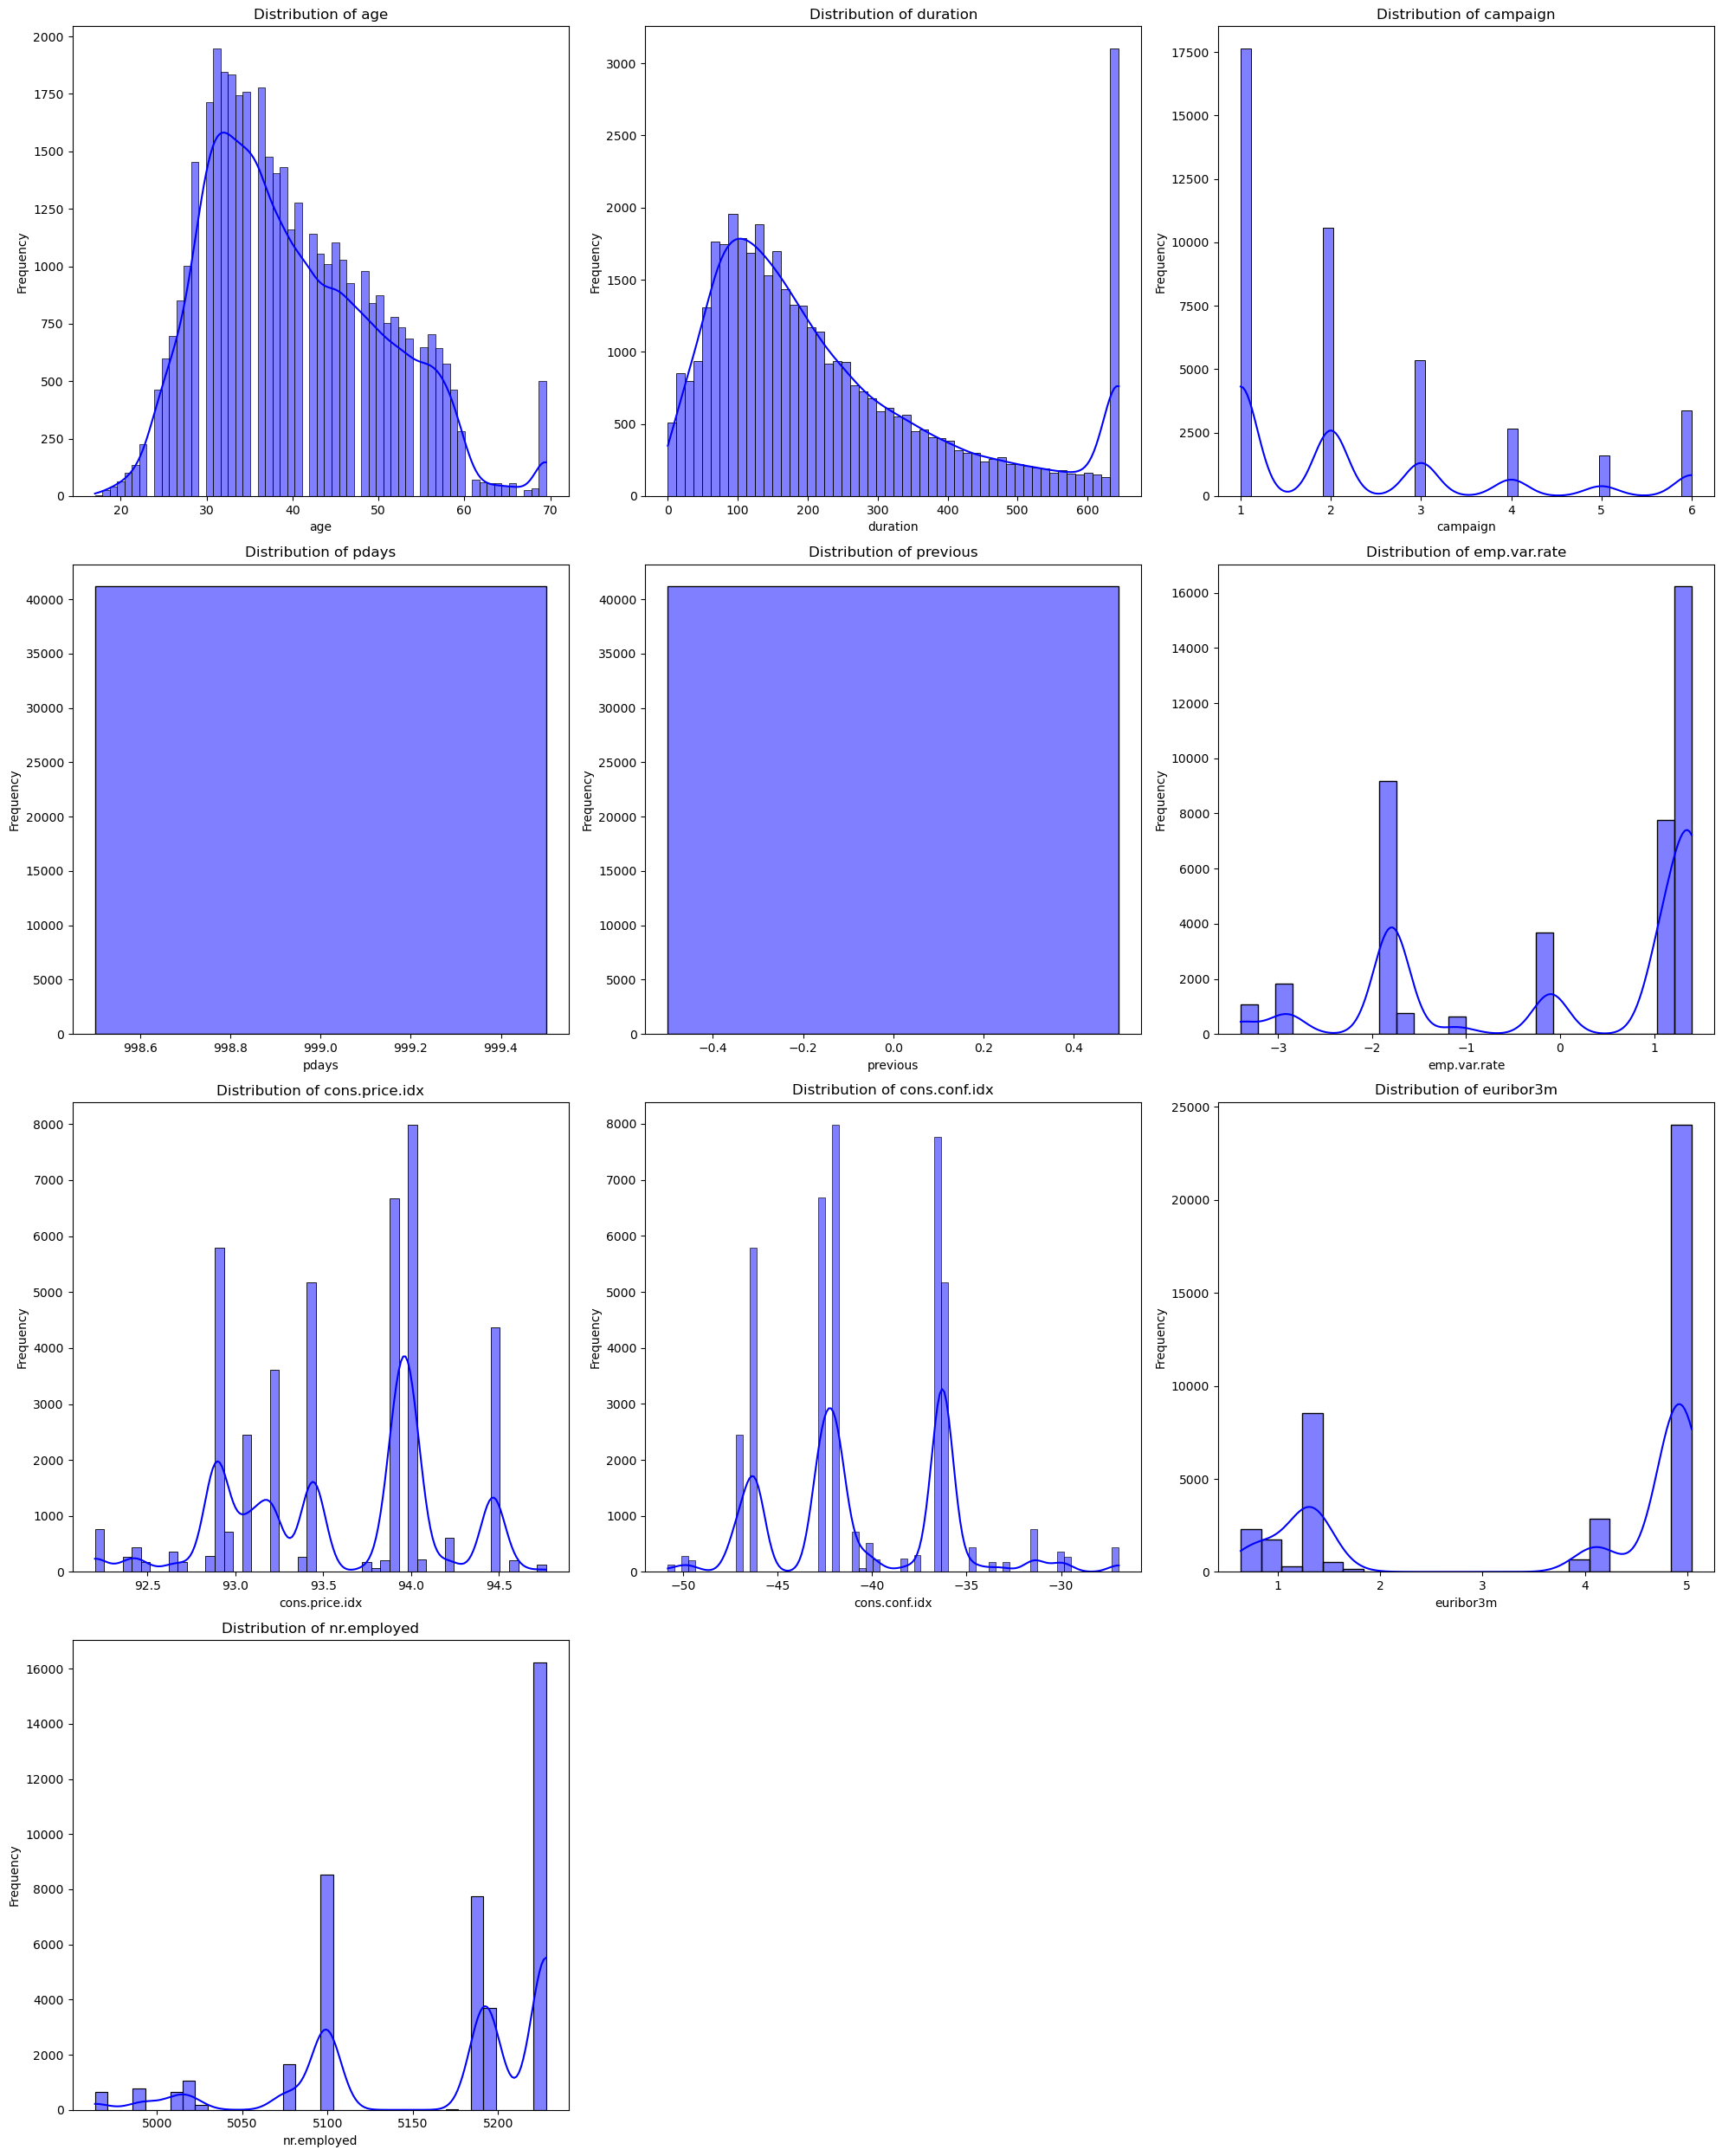

In [39]:
plotter_2.histplot()

In [40]:
print('The Skewness after removing Outliers:\n',df[numerical_cols].skew())
print('The Kurtosis after removing Outliers:\n',df[numerical_cols].kurtosis())

The Skewness after removing Outliers:
 age               0.567396
duration          1.044688
campaign          1.211974
pdays             0.000000
previous          0.000000
emp.var.rate     -0.724061
cons.price.idx   -0.230853
cons.conf.idx     0.300514
euribor3m        -0.709194
nr.employed      -1.044317
dtype: float64
The Kurtosis after removing Outliers:
 age              -0.245999
duration          0.111522
campaign          0.407936
pdays             0.000000
previous          0.000000
emp.var.rate     -1.062698
cons.price.idx   -0.829851
cons.conf.idx    -0.367166
euribor3m        -1.406791
nr.employed      -0.003540
dtype: float64


## Heatmap

<Axes: >

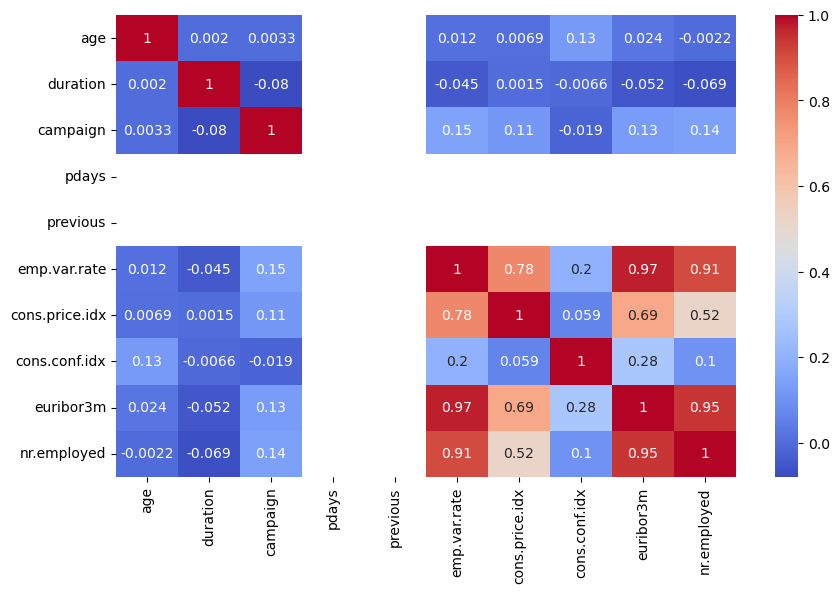

In [42]:
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True,cmap='coolwarm')

In [43]:
df[['pdays','previous']].value_counts()

pdays  previous
999    0           41176
Name: count, dtype: int64

- In the correlation heatmap pdays and previous appears white because it has contant value 999 and 0.
- Correlation requires variability in the values, its standard deviation is 0, so these two features 
  have no predictive power and can be removed.
- Also multicollinearity between emp.var.rate and euribor3m is .97 , multicolleniarity between emp.var.rate
  and  nr.employed is .91, between euribor3m and nr.employed is .95. So drop 

In [45]:
df.drop(columns=['pdays','previous','emp.var.rate','euribor3m'],inplace=True, axis=1)
df

,age,job,marital,education,housing,loan,duration,campaign,poutcome,cons.price.idx,cons.conf.idx,nr.employed,deposit
0,56.0,housemaid,married,basic.4y,no,no,261.0,1,nonexistent,93.994,-36.4,5191.0,no
1,57.0,services,married,high.school,no,no,149.0,1,nonexistent,93.994,-36.4,5191.0,no
2,37.0,services,married,high.school,yes,no,226.0,1,nonexistent,93.994,-36.4,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,151.0,1,nonexistent,93.994,-36.4,5191.0,no
4,56.0,services,married,high.school,no,yes,307.0,1,nonexistent,93.994,-36.4,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,69.5,retired,married,professional.course,yes,no,334.0,1,nonexistent,94.767,-50.8,4963.6,yes
41184,46.0,blue-collar,married,professional.course,no,no,383.0,1,nonexistent,94.767,-50.8,4963.6,no
41185,56.0,retired,married,university.degree,yes,no,189.0,2,nonexistent,94.767,-50.8,4963.6,no
41186,44.0,technician,married,professional.course,no,no,442.0,1,nonexistent,94.767,-50.8,4963.6,yes


## Data Visualization

### Percentage of Deposit Subscribe

Text(0.5, 1.0, 'Deposit Distribution')

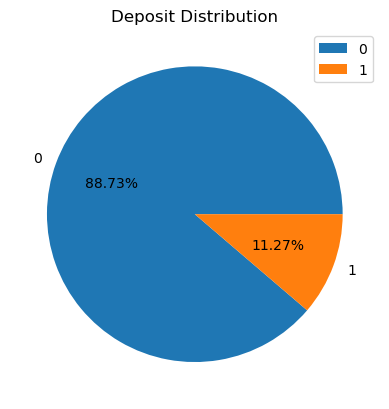

In [48]:
plt.pie(df['deposit'].value_counts(),autopct='%1.2f%%',labels=[0,1])
plt.legend()
plt.title('Deposit Distribution')

In [49]:
class Subscribers:
    def __init__(self,dataframe):
        self.df = dataframe
        
    def count_plot(self,column):
        plt.figure(figsize=(16,6))
        ax= sns.countplot(data=df,x=column,hue='deposit')
        for i in ax.containers:
            ax.bar_label(i)
        plt.title(f'Deposit Subscribers by{column}')


plotter_3 = Subscribers(df)


### Subscribers by Job

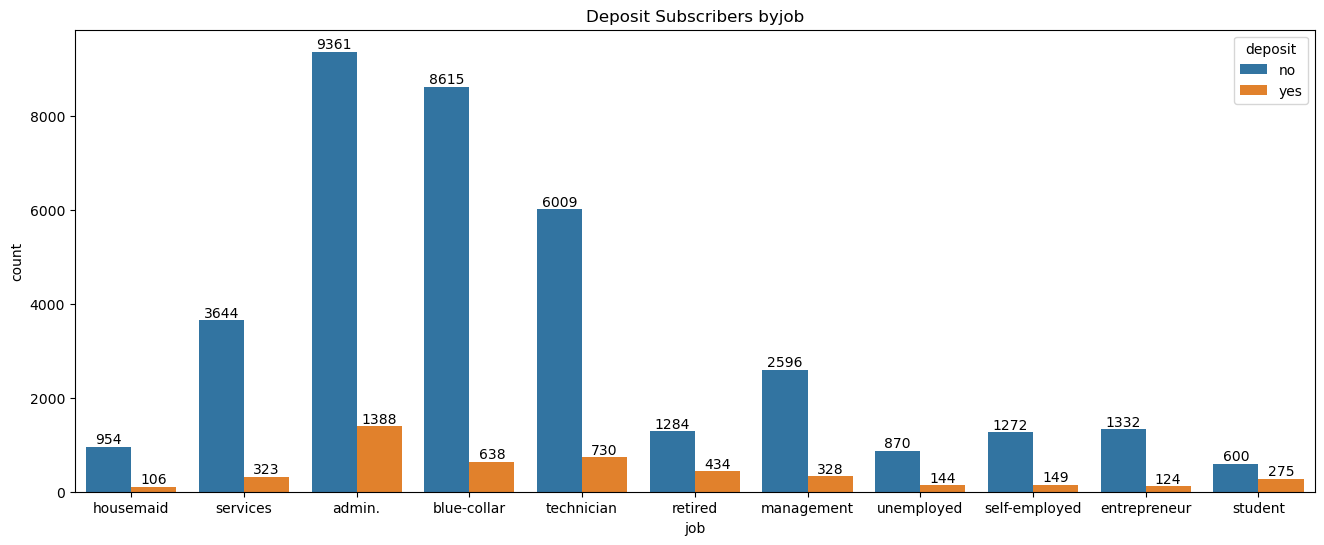

In [51]:
plotter_3.count_plot('job')

### Subscribed deposit by Job

([<matplotlib.patches.Wedge at 0x22701dce780>,
 [Text(0.6487916106818702, 0.8882958099129055, 'admin.'),
  Text(-0.7917795901939101, 0.7636000789368503, 'technician'),
  Text(-1.0860994239021737, -0.17432166072914337, 'blue-collar'),
  Text(-0.696518104204793, -0.8513885896081538, 'retired'),
  Text(-0.1857123401593095, -1.0842098167386944, 'management'),
  Text(0.2947019623084735, -1.059788070045863, 'services'),
  Text(0.688414988680176, -0.8579538468708403, 'student'),
  Text(0.9032102975390508, -0.6278623721958655, 'self-employed'),
  Text(1.0092547645176697, -0.437498366052244, 'unemployed'),
  Text(1.0716457967269195, -0.24814368087365488, 'entrepreneur'),
  Text(1.0971670528303392, -0.07889523549358085, 'housemaid')],
 [Text(0.3538863330992019, 0.4845249872252211, '29.92%'),
  Text(-0.4318797764694055, 0.41650913396555467, '15.74%'),
  Text(-0.5924178675830037, -0.09508454221589638, '13.75%'),
  Text(-0.37991896592988705, -0.464393776149902, '9.36%'),
  Text(-0.10129764008689608

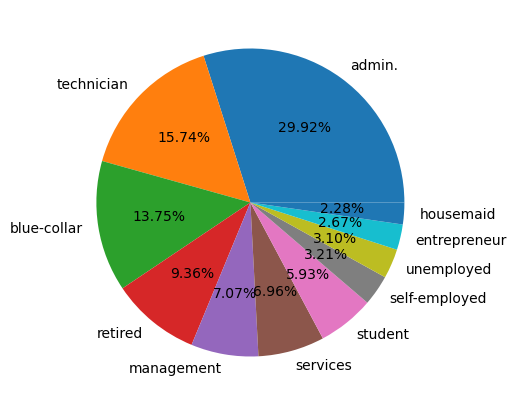

In [53]:
accepted = df[df['deposit']=='yes']

plt.figure(figsize=(5,5))
plt.pie(accepted['job'].value_counts(),
        labels = accepted['job'].value_counts().index,
        autopct='%1.2f%%')

### Distribution by Marital

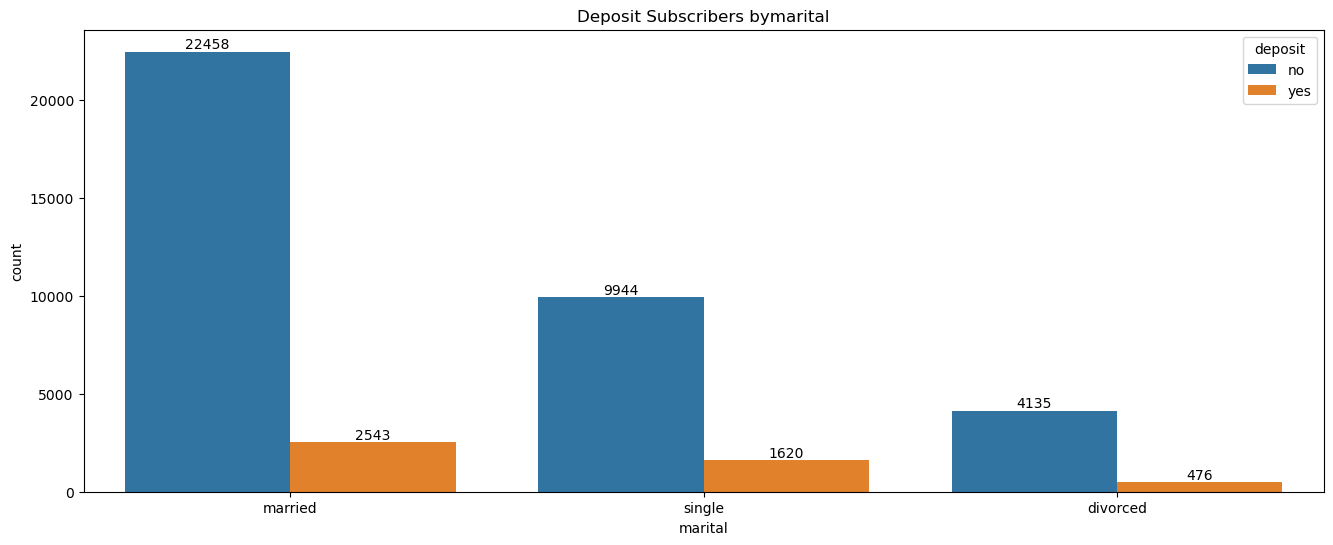

In [55]:
plotter_3.count_plot('marital')

### Distribution by Education

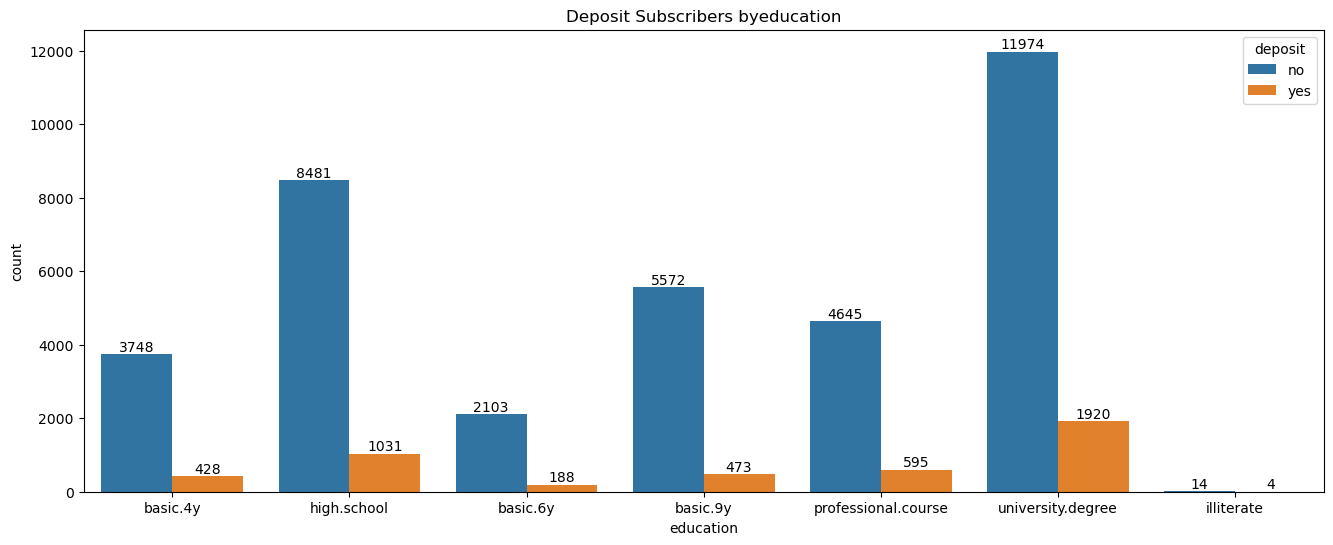

In [57]:
plotter_3.count_plot('education')

### Distribution by  Housing Loan

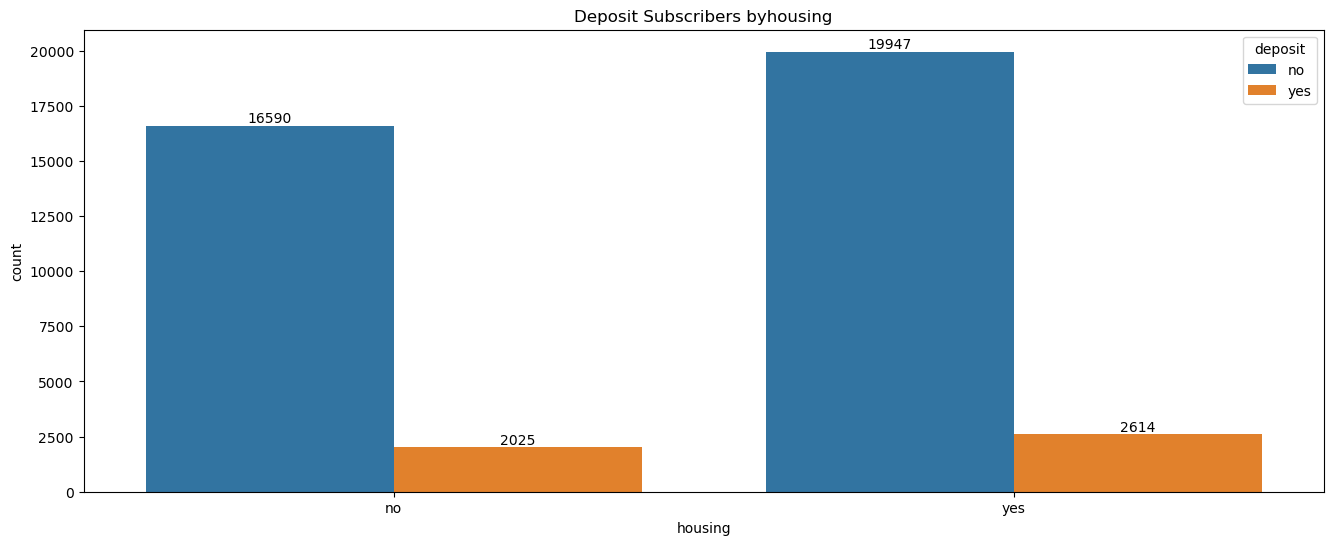

In [59]:
plotter_3.count_plot('housing')

### Subscriber by Personal Loan

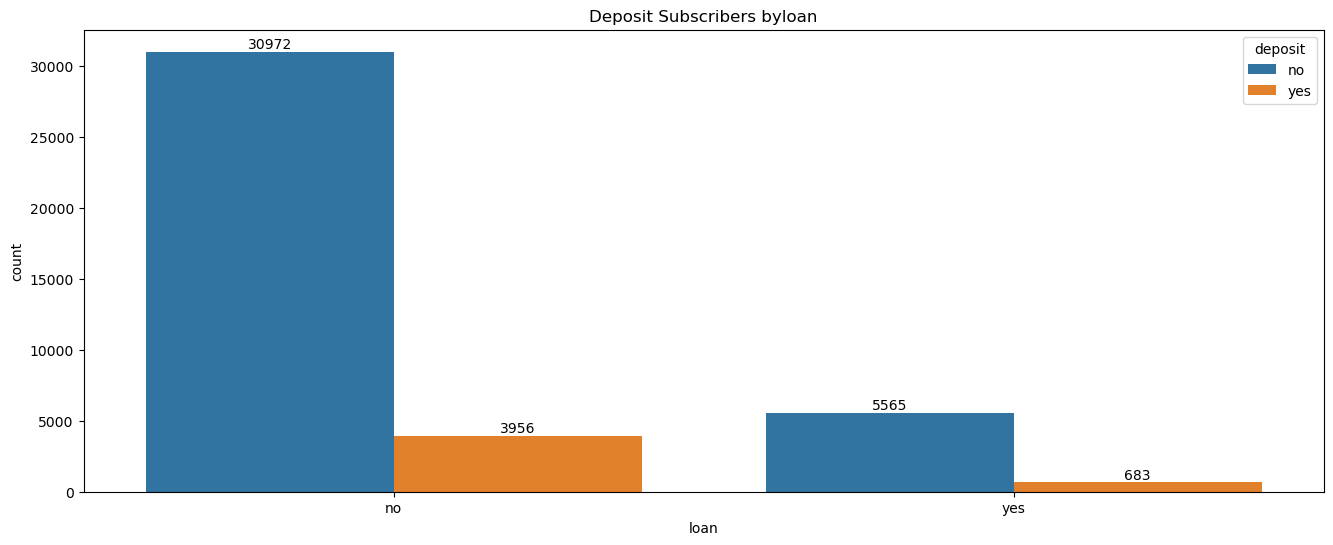

In [61]:
plotter_3.count_plot('loan')

### Age Deposit Distribution

C:\Users\HP\AppData\Local\Temp\ipykernel_11632\3194176225.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x='deposit',y='age', palette='Set2')


Text(0.5, 1.0, 'Distribution of Age by Deposit Subscription')

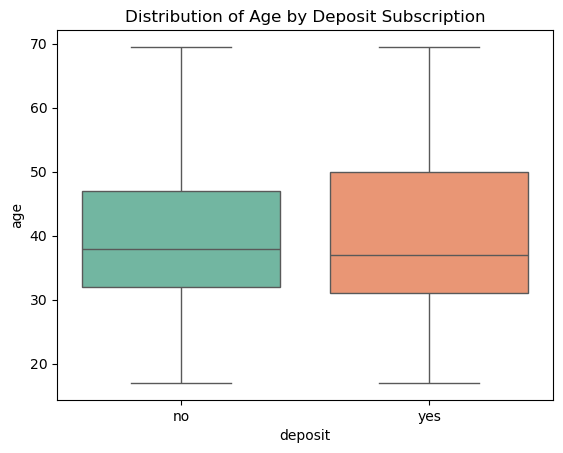

In [63]:
sns.boxplot(data=df,x='deposit',y='age', palette='Set2')
plt.title('Distribution of Age by Deposit Subscription')

- Both 'yes' and 'no' groups have similiar median age(around mid 30). However, people who subscribed 'yes' seem to have
  a slightly wider spread in age . More older individual in upper quartile compared to 'no' group.
- The range is roughly same, but the distribution shows subtle difference.
- Feature 'age' alone is not a strong determinant.

### Age Distribution by Job and Deposit

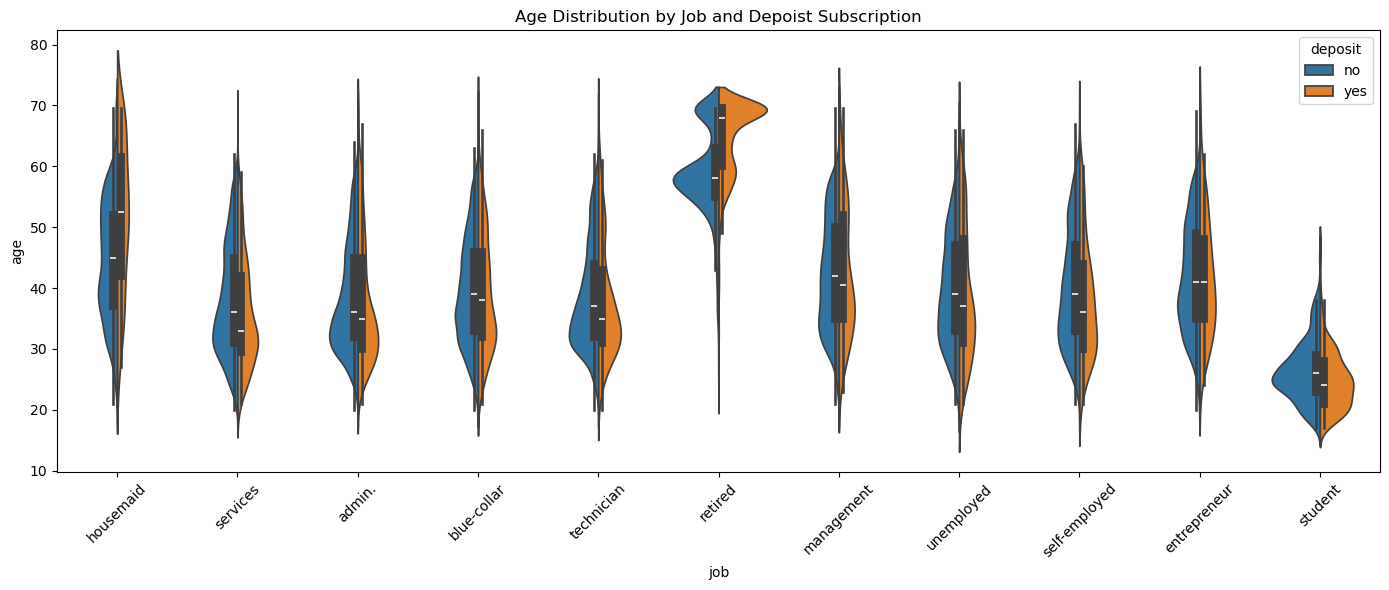

In [66]:
plt.figure(figsize=(14,6))
sns.violinplot(data=df, x='job',y='age',hue='deposit',split=True)
plt.xticks(rotation=45)
plt.title('Age Distribution by Job and Depoist Subscription')
plt.tight_layout()
plt.show()

- From the violinplot, Retired shows strong trend toward subscribing 'yes'(orange violin is denser and higher than blue)
- Students more likely not ot subscribe (blue is dominant comapred to orange)
- Management and Admin, both yes and no have presence.
- Blue-collar, management, unemployed, self-employed and entreprenur, all these features subscriptions are mixed, but
- tend slighly toward 'no' in younger ages.

### Age Distribution by Marital and Deposit

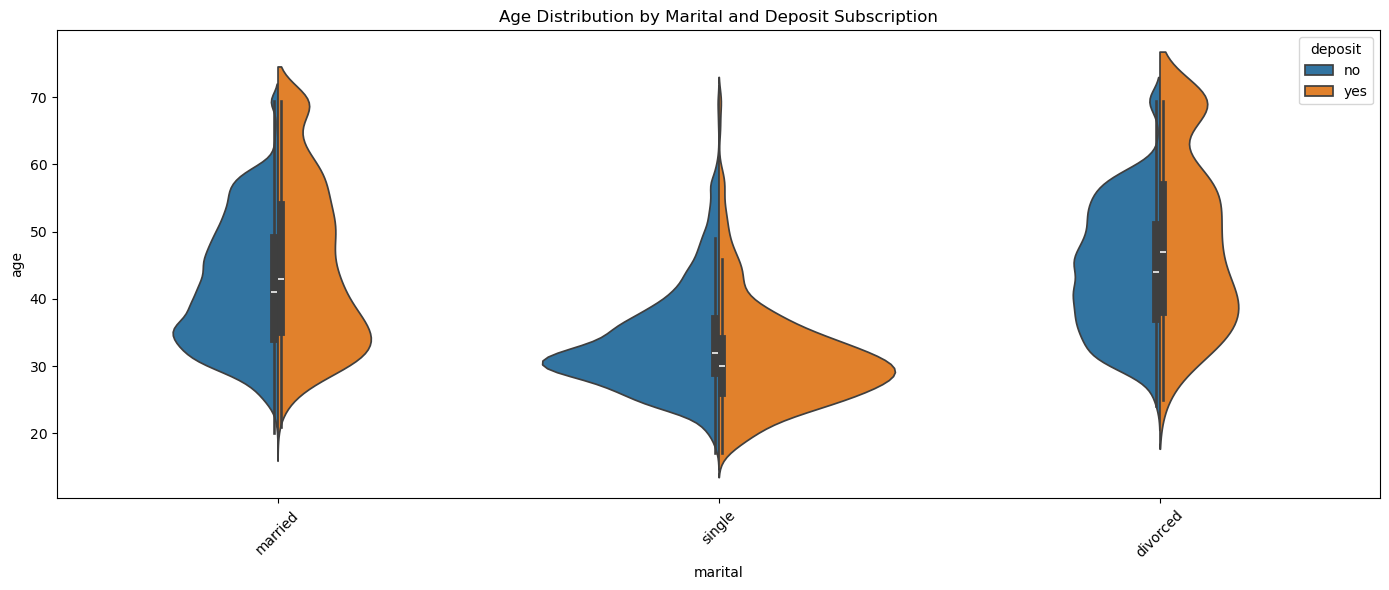

In [69]:
plt.figure(figsize=(14,6))
sns.violinplot(data=df, x='marital',y='age', hue='deposit',split=True)
plt.xticks(rotation=45)
plt.title('Age Distribution by Marital and Deposit Subscription')
plt.tight_layout()
plt.show()

- Married : Both yes and no groups are concentrated around 35-55 years. Slightly more people above 50 is yes group.
  Median is slightly higher for yes group(more older people subscribed).

- Single: Age distribution is lower and narrower, most users around 30 years. Medians are close, but yes may skew a bit younger

- Divorced: Wider age spread, especially in the yes group. The median for yes seems slightly higher.
  More eldery people in the yes group again

### Duration Distribution

C:\Users\HP\AppData\Local\Temp\ipykernel_11632\3434422984.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x='deposit',y='duration', palette='Set2')


Text(0.5, 1.0, 'Distribution of Duration by Deposit Subscription')

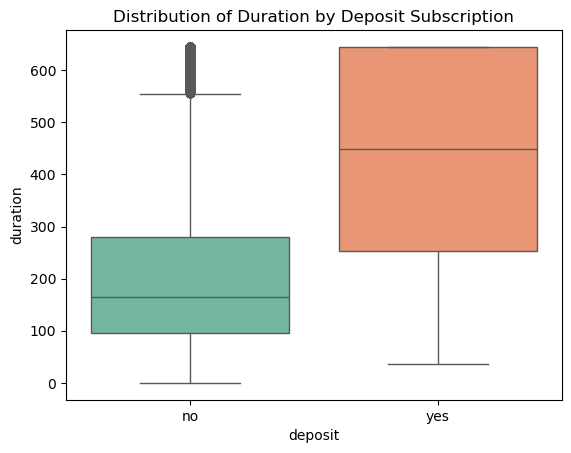

In [72]:
sns.boxplot(data=df,x='deposit',y='duration', palette='Set2')
plt.title('Distribution of Duration by Deposit Subscription')

1. Deposit = Yes:
   - Median duration is around 450 seconds.
   - The IQR spans from around 260 to 640 seconds.
   - Almost no visible outliers.
   - This suggest longer calls are strongly associated with a yes deposit
2. Deposit =  No:
   - Median duration is mich lower(around 150 seconds)
   - The IQR is roughly between 100 and 280 seconds.
   - Many Many outliers above the top whisker(calls longer than 550 seconds)
   - This indicates: shorter calls are generally unsuccessful, but a few long calls also result in a no.

### Encode Categorical Features

In [75]:
categorical_cols = ['job', 'marital', 'education', 'housing', 'loan', 'poutcome',
       'deposit']


# Initialize the encoder
encoder = LabelEncoder()

# Apply label Encoding to all categorical columnn
for col in categorical_cols:
    df[col]=encoder.fit_transform(df[col])



In [76]:
df.head()

,age,job,marital,education,housing,loan,duration,campaign,poutcome,cons.price.idx,cons.conf.idx,nr.employed,deposit
0,56.0,3,1,0,0,0,261.0,1,1,93.994,-36.4,5191.0,0
1,57.0,7,1,3,0,0,149.0,1,1,93.994,-36.4,5191.0,0
2,37.0,7,1,3,1,0,226.0,1,1,93.994,-36.4,5191.0,0
3,40.0,0,1,1,0,0,151.0,1,1,93.994,-36.4,5191.0,0
4,56.0,7,1,3,0,1,307.0,1,1,93.994,-36.4,5191.0,0


### Train Test Split

In [78]:
# Split into X and y

X=df.drop(columns=['deposit','duration'],axis=1)
y=df['deposit']

- The duration column was removed because it is only known after the call is made. Using it would give the model unfair information and make the accuracy unrealistically high.

In [80]:
# Train Test Split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25,stratify=y,random_state=42)

print('The shape of X_train:',X_train.shape)
print('The shape of X_test:',X_test.shape)
print('The shape of y_train:',y_train.shape)
print('The shape of y_test:',y_test.shape)

The shape of X_train: (30882, 11)
The shape of X_test: (10294, 11)
The shape of y_train: (30882,)
The shape of y_test: (10294,)


In [81]:
numerical_cols = ['age','campaign','cons.price.idx','cons.conf.idx','nr.employed']

# Initialize the scaler
scaler = StandardScaler()

# Scaling train data and test data

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [82]:
# Apply SMOTE on training data

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)

In [83]:
print('The shape of X_train_smote:',X_train_smote.shape)
print('The shape of y_train_smote:',y_train_smote.shape)
print()
print('Before Smote:',y_train.value_counts())
print('\n After Smote:',y_train_smote.value_counts())

The shape of X_train_smote: (54806, 11)
The shape of y_train_smote: (54806,)

Before Smote: deposit
0    27403
1     3479
Name: count, dtype: int64

 After Smote: deposit
0    27403
1    27403
Name: count, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_11632\1633031072.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = y_train.value_counts().index, y = y_train.value_counts().values, palette='viridis',ax=axes[0])
C:\Users\HP\AppData\Local\Temp\ipykernel_11632\1633031072.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y_train_smote.value_counts().index, y = y_train_smote.value_counts().values, palette='viridis', ax=axes[1])


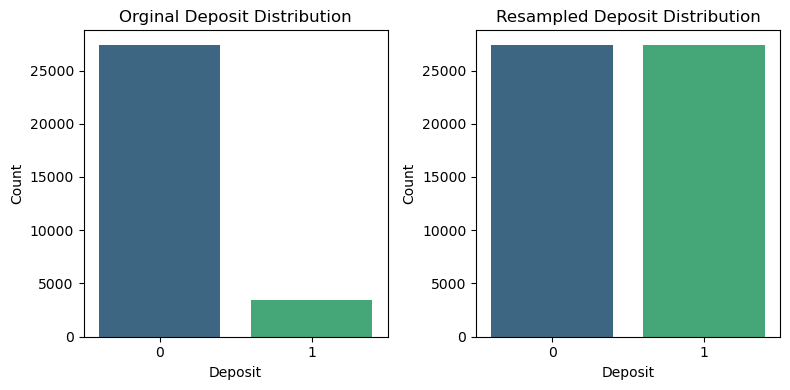

In [84]:
# Plot Orginal vs resampled class distribution
fig, axes = plt.subplots(1,2, figsize=(8,4))

# Orginal Distribution
sns.barplot(x = y_train.value_counts().index, y = y_train.value_counts().values, palette='viridis',ax=axes[0])
axes[0].set_title('Orginal Deposit Distribution')
axes[0].set_xlabel('Deposit')
axes[0].set_ylabel('Count')

# Resample Distribution
sns.barplot(x=y_train_smote.value_counts().index, y = y_train_smote.value_counts().values, palette='viridis', ax=axes[1])
axes[1].set_title('Resampled Deposit Distribution')
axes[1].set_xlabel('Deposit')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

        

### Neural Network Setting

In [86]:
# Define the model

model = Sequential([
                   Dense(64, activation='relu',input_shape=(X_train_smote.shape[1],)),
                   Dropout(0.3),
                   Dense(32, activation='relu'),
                   Dropout(0.3),
                   Dense(1,activation='sigmoid')
])



# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
        
# Train the model
history = model.fit(X_train_smote,y_train_smote,
                    validation_data=(X_test,y_test),
                    epochs=25, batch_size=32,callbacks=[early_stop])

# Evaluate the model
loss, accuracy = model.evaluate(X_test,y_test)
print(f'Test accuracy :{accuracy}')
print(f'Test loss:{loss}')
            

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.6649 - loss: 0.6303 - val_accuracy: 0.7976 - val_loss: 0.5452
Epoch 2/25
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7179 - loss: 0.5645 - val_accuracy: 0.8068 - val_loss: 0.5443
Epoch 3/25
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7207 - loss: 0.5570 - val_accuracy: 0.7915 - val_loss: 0.5328
Epoch 4/25
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7272 - loss: 0.5525 - val_accuracy: 0.8276 - val_loss: 0.5024
Epoch 5/25
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7267 - loss: 0.5500 - val_accuracy: 0.7808 - val_loss: 0.5412
Epoch 6/25
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7316 - loss: 0.5425 - val_accuracy: 0.7875 - val_loss: 0.5166
Epoch 7/25
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7313 - loss: 0.5417 - val_accuracy: 0.7636 - val_loss: 0.5492
Epoch 8/25
1713/1713 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7337 - loss: 0.5377 -

In [87]:
# Prediction
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob>0.5).astype(int)
print(y_pred)

322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[0]
 [1]
 [0]
 ...
 [0]
 [0]
 [0]]


### Visualizing the Accuracy and Loss

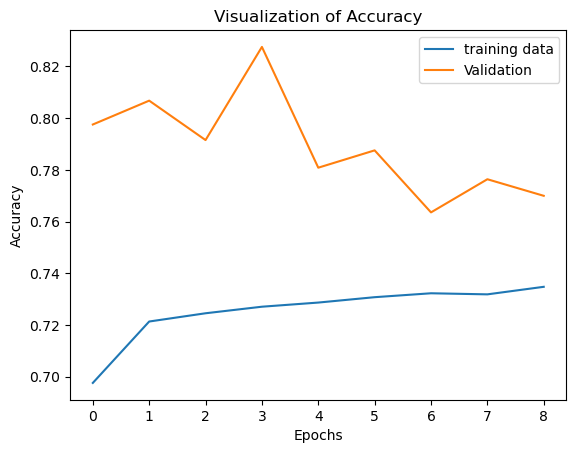

In [89]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Visualization of Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend(['training data','Validation'])
         

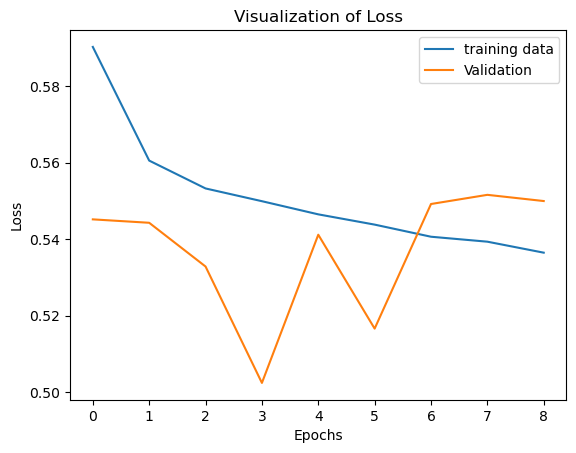

In [90]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Visualization of Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend(['training data','Validation'])

In [173]:
accuracy
conf_matrix= confusion_matrix(y_test,y_pred)
class_report = classification_report(y_test,y_pred)

print(f'The accuracy score is: {accuracy}')
print(f'The Confusion matrix is:\n{conf_matrix}')
print(f'The Classification report is:\n{class_report}')

The accuracy score is: 0.8275694847106934
The Confusion matrix is:
[[7803 1331]
 [ 444  716]]
The Classification report is:
              precision    recall  f1-score   support

           0       0.95      0.85      0.90      9134
           1       0.35      0.62      0.45      1160

    accuracy                           0.83     10294
   macro avg       0.65      0.74      0.67     10294
weighted avg       0.88      0.83      0.85     10294



Text(33.22222222222222, 0.5, 'Label')

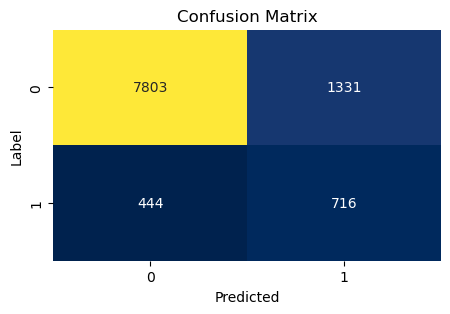

In [177]:
# plot the confusion matrix

plt.figure(figsize=(5,3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='cividis',cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Label')
    

### Conclusion


In [ ]:
Model predicts with the accuracy of 